# ANIPICT Görüntü Sınıflandırma

##Ortam Hazırlığı

In [ ]:
# Drive'a Bağlanma
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/Anipict/image_classification

/content/drive/MyDrive/Anipict/image_classification


In [ ]:
# Ultralytics'i İndirme
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


## Eğitim / Training

In [ ]:
# Dosyaları ayıklama
!unzip data/keciler_dataset.zip -d ./data


Archive:  data/keciler_dataset.zip
   creating: ./data/keciler_dataset/
  inflating: ./data/keciler_dataset/README.dataset.txt  
  inflating: ./data/keciler_dataset/README.roboflow.txt  
   creating: ./data/keciler_dataset/test/
   creating: ./data/keciler_dataset/test/AnkaraKecisi/
  inflating: ./data/keciler_dataset/test/AnkaraKecisi/AnkaraKecisi13_jpg.rf.ecb2eb89efe7cebb665a8bd359009cc8.jpg  
  inflating: ./data/keciler_dataset/test/AnkaraKecisi/AnkaraKecisi3_jpg.rf.8e34787028d19d1a3487dd8d53edc4ba.jpg  
  inflating: ./data/keciler_dataset/test/AnkaraKecisi/AnkaraKecisi40_jpg.rf.901e12a11f0248a8744b499a491a7895.jpg  
  inflating: ./data/keciler_dataset/test/AnkaraKecisi/AnkaraKecisi41_jpg.rf.7641ddf19f943c8d52e55223aebfe6e8.jpg  
  inflating: ./data/keciler_dataset/test/AnkaraKecisi/AnkaraKecisi44_jpg.rf.eac9865f1511068a97116fdf6af96cd4.jpg  
  inflating: ./data/keciler_dataset/test/AnkaraKecisi/AnkaraKecisi48_jpg.rf.7dee961c8e5bba5600f5595440686f58.jpg  
  inflating: ./data/keciler

In [ ]:
%pwd

'/content/drive/MyDrive/Anipict/image_classification'

In [ ]:
# Eğitim
!yolo classify train model=yolov8l-cls.pt data=data/keciler_dataset imgsz=224 workers=8 batch=16 device=0 epochs=100 name="yolov8_anipict_classification"


100% 71.7M/71.7M [00:00<00:00, 215MB/s]
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=data/keciler_dataset, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_anipict_classification, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

In [ ]:
# Eğitim yarıda kesilirse
!yolo classify train model=runs/classify/yolov8_classification/weights/last.pt resume=True # Eğitim kaldığı yerden devam ediyor

## ANIPICT Sınıflandırma / Prediciton

In [ ]:
# Resim Sınıflandırma
!yolo classify predict model=runs/classify/yolov8_anipict_classification/weights/best.pt source=inference save=True

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-cls summary (fused): 54 layers, 36,197,386 parameters, 0 gradients, 98.7 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 987, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 550, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 234, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packag

In [ ]:
%pwd

'/content/drive/MyDrive/Anipict/image_classification'


image 1/1 /content/drive/MyDrive/Anipict/image_classification/deneme-resimler/YabanKecisi.jpg: 224x224 YabanKecisi 1.00, Kilkecisi 0.00, AnkaraKecisi 0.00, SaanenKecisi 0.00, NorduzKecisi 0.00, 10.9ms
Speed: 48.5ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Sınıflar {0: 'AnkaraKecisi', 1: 'HalepKecisi', 2: 'HonamliKecisi', 3: 'KilisKecisi', 4: 'Kilkecisi', 5: 'MaltaKecisi', 6: 'NorduzKecisi', 7: 'SaanenKecisi', 8: 'YabanKecisi', 9: 'YabanKecisi+HalepKecisi'}
Olasılıklar [3.3052761864382774e-05, 5.74424802834983e-07, 3.6226531392458128e-06, 4.37995095126098e-06, 9.179720655083656e-05, 1.5136099591472885e-06, 1.2931198398291599e-05, 1.68539827427594e-05, 0.9998276233673096, 7.634444045834243e-06]
Sonuç YabanKecisi


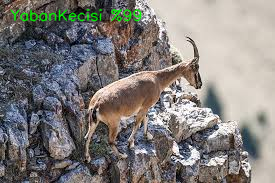

In [ ]:
import numpy as np
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

img_path="deneme-resimler/YabanKecisi.jpg"
model_path="runs/classify/yolov8_anipict_classification/weights/best.pt"

model = YOLO(model_path) # modeli yükleme
results = model(img_path) # resmi yükle ve sınıflandır

class_dict = results[0].names
probs = results[0].probs.data.tolist()
print("Sınıflar", class_dict)
print("Olasılıklar", probs)

# En yüksek olasılığa dair sınıfı bulmak

print("Sonuç", class_dict[np.argmax(probs)])

# cv2.putText() metodu ile sonuçları resim üzerine yazdır / cv2_imshow ile göster
name = class_dict[np.argmax(probs)]
max_prob = int(np.max(probs)*100)

img = cv2.imread(img_path)

#print(name + " " + "%" + str(max_prob))

text = name + " " + "%" + str(max_prob)

cv2.putText(img, text, (10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
cv2_imshow(img)